<h1> Model Training with Ultralytics YOLO </h1>
<div align="center">
   Welcome to the Kenyan Coin Detection and Classification with YOLOv8 🚀 notebook! This guide is designed to help you train a model using the latest YOLOv8 AI models from [Ultralytics](https://ultralytics.com). In this notebook, we will walk you through the process of detecting and classifying Kenyan coins, from data collection and labeling to deploying your final model in an application.

### Overview of YOLOv8
YOLOv8 is the latest iteration of the YOLO (You Only Look Once) series, known for its speed, accuracy, and ease of use. Developed by [Ultralytics](https://github.com/ultralytics/ultralytics), YOLOv8 is perfect for various object detection and image segmentation tasks, capable of being trained on extensive datasets and running on diverse hardware platforms, from CPUs to GPUs.

### Tutorial Highlights
1. **Data Collection and Labeling**: Learn how to collect high-quality images of Kenyan coins and accurately label them using the [Labeling](https://github.com/HumanSignal/labelImg#installation) tool. Proper labeling is crucial for the success of your model, ensuring that it can accurately identify and classify different coins.

2. **Hosting on Roboflow**: Discover how to host your labeled data on (<a href="https://universe.roboflow.com/kenyan-coins-data/openvission">
    <img src="https://app.roboflow.com/images/download-dataset-badge.svg"></img>
</a>). Roboflow provides an efficient platform for organizing, annotating, and preprocessing your datasets, making it easier to train robust and reliable models. <a href="https://universe.roboflow.com/kenyan-coins-data/openvission/model/">
    <img src="https://app.roboflow.com/images/try-model-badge.svg"></img>
</a>

3. **Model Training with YOLOv8**: Follow our step-by-step instructions to train your YOLOv8 model on the Kenyan coin dataset. We will cover essential concepts such as hyperparameter tuning, data augmentation, and model evaluation to help you achieve the best performance.

4. **Model Deployment**: Finally, learn how to deploy your trained model in a real-world application. We will guide you through integrating your model into an application, allowing you to detect and classify Kenyan coins in real time.

### Getting Started
To get started, please explore the YOLOv8 [Docs](https://docs.ultralytics.com) for detailed information on installation, configuration, and usage. If you encounter any issues or have questions, feel free to raise an issue on [GitHub](https://github.com/stevalberts/openvision). 
We hope that this tutorial will empower you to harness the capabilities of YOLOv8 for detecting and classifying Kenyan coins. Let's dive in and start building your custom object detection model!

</div>

# Setup

In [1]:
#Uncomment to install the packages below 
!pip install ultralytics
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 22.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


### Connecting to Roboflow and Downloading the Dataset

At this stage, we are setting up the connection to Roboflow, an essential platform for managing our dataset. We will use Roboflow to download the pre-labeled dataset that we will use to train our YOLOv8 model. The code downloads the dataset in a format compatible with YOLOv8. This step prepares the data for training our object detection model.
By following these steps, you ensure that you have the necessary data in the correct format to train your YOLOv8 model effectively.



In [3]:
!pip install roboflow

from roboflow import Roboflow
#Make sure to get your own api keys
rf = Roboflow(api_key="XXXXXX")
project = rf.workspace("kenyan-coins-data").project("openvission")
version = project.version(2)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 31.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you 


Extracting Dataset Version Zip to Openvission-2 in yolov8:: 100%|██████████| 1178/1178 [00:00<00:00, 7163.64it/s]



### Configuring the Dataset Paths

In this stage, we are working with a YAML configuration file that contains paths and settings for our dataset. This configuration file is crucial for directing the YOLOv8 model to the correct locations of the training, validation, and test data. Here’s what we’re doing in this stage:

1. **Loading the YAML File**: We start by loading the existing YAML configuration file. This file contains various settings related to our dataset, including paths to the training, validation, and test images.

2. **Viewing the Current Configuration**: We print the current content of the YAML file to understand its structure and the existing configurations. This helps us know what needs to be updated.

3. **Updating Dataset Paths**: We make necessary changes to the paths specified in the YAML file. Specifically, we update the paths for the test, train, and validation datasets to ensure they point to the correct directories. This step is crucial because the model relies on these paths to access the data during training and evaluation.

4. **Saving the Updated Configuration**: After making the changes, we save the updated configuration back to the YAML file. This ensures that the new paths are preserved and will be used by the model during the training process.

By completing this stage, we ensure that our dataset is properly configured and that the YOLOv8 model will be able to access the correct data for training, validation, and testing. This step is essential for the successful training and evaluation of the model.


In [4]:
import yaml

# Load the YAML file
with open('/kaggle/working/Openvission-2/data.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Print the current content
print(config)

{'names': ['Ksh 1', 'Ksh 10', 'Ksh 20', 'Ksh 5'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'openvission', 'url': 'https://universe.roboflow.com/kenyan-coins-data/openvission/dataset/2', 'version': 2, 'workspace': 'kenyan-coins-data'}, 'test': '../test/images', 'train': 'Openvission-2/train/images', 'val': 'Openvission-2/valid/images'}


In [5]:
# Make changes to the configuration
config['test'] ='/kaggle/working/Openvission-2/test/images'
config['train']='/kaggle/working/Openvission-2/valid/images'
config['val'] ='/kaggle/working/Openvission-2/train/images'
# Save the changes back to the YAML file
with open('/kaggle/working/Openvission-2/data.yaml', 'w') as file:
    yaml.safe_dump(config, file)

### Training the YOLOv8 Model

In this stage, we initiate the training process for the YOLOv8 model. We will use the YOLOv8n architecture, a lightweight variant optimized for speed and efficiency, to detect and classify Kenyan coins.


In [6]:
# Train YOLOv8n on COCO8 for 2000 epochs
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/Openvission-2/data.yaml epochs=2000 imgsz=640

100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 102MB/s]
Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Openvission-2/data.yaml, epochs=2000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

# Display the results From the model

In [7]:
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()

# Confusion matrix

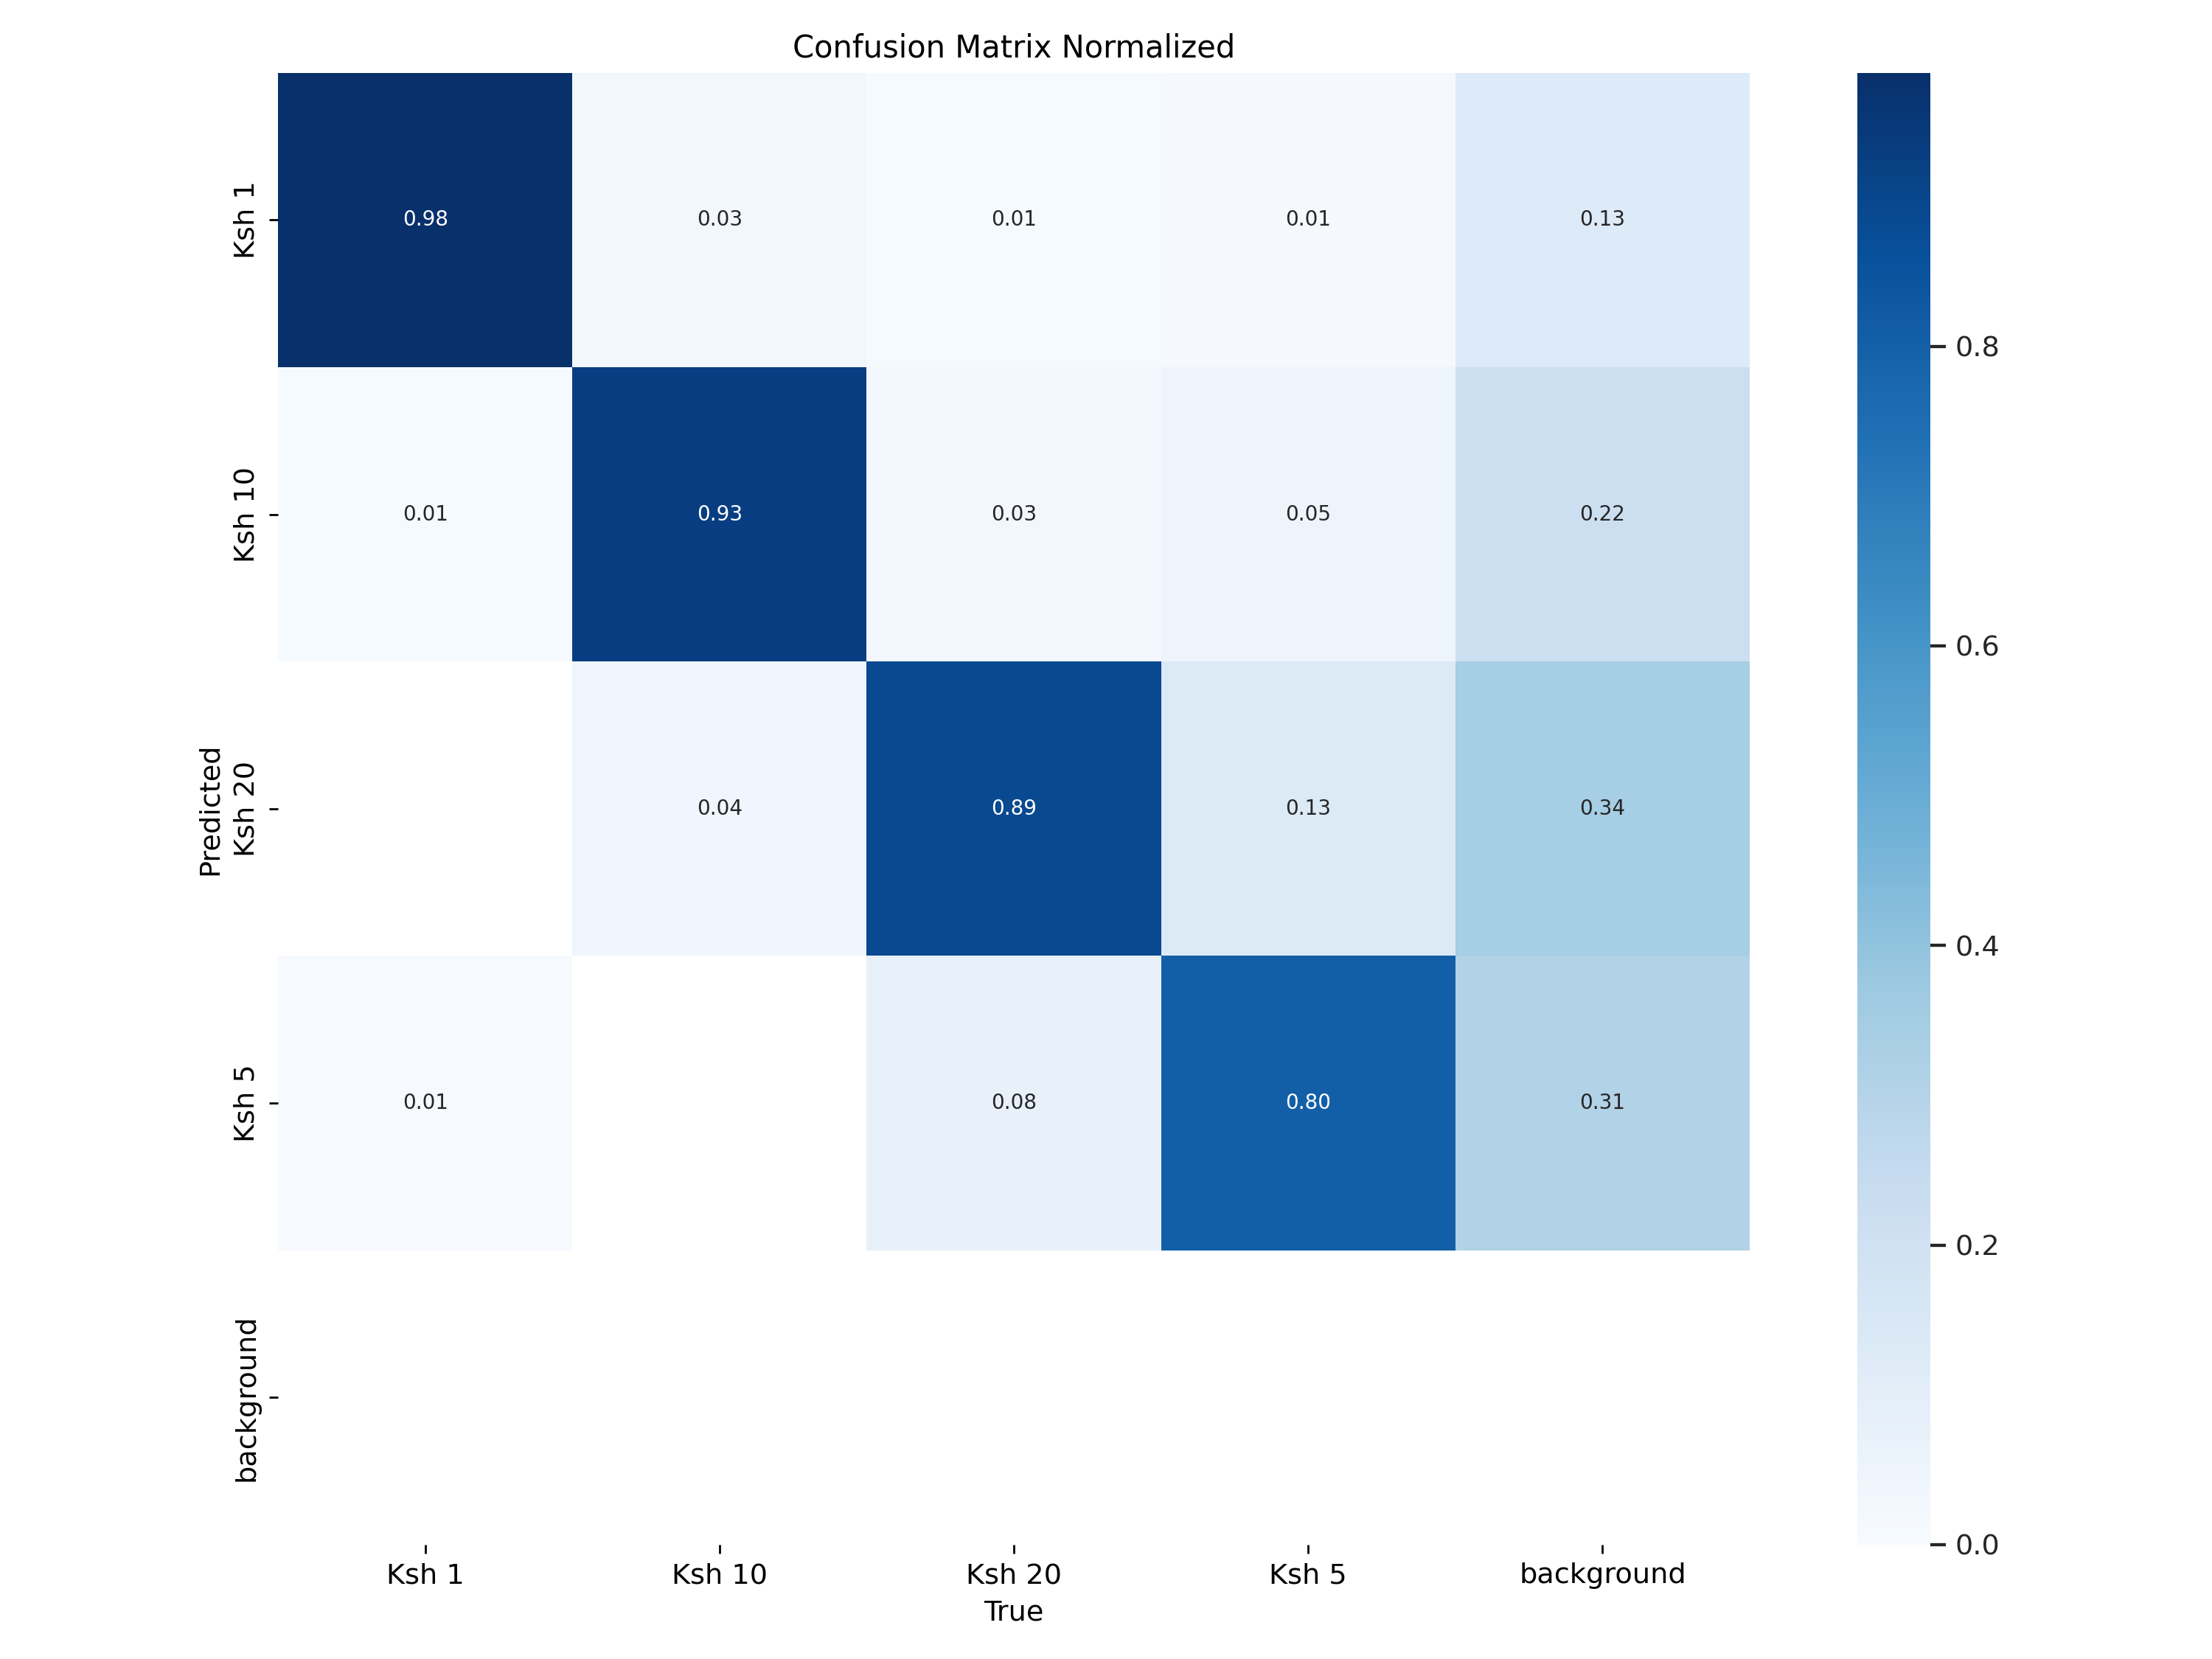

In [8]:
Image(filename= f'/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

# Train results

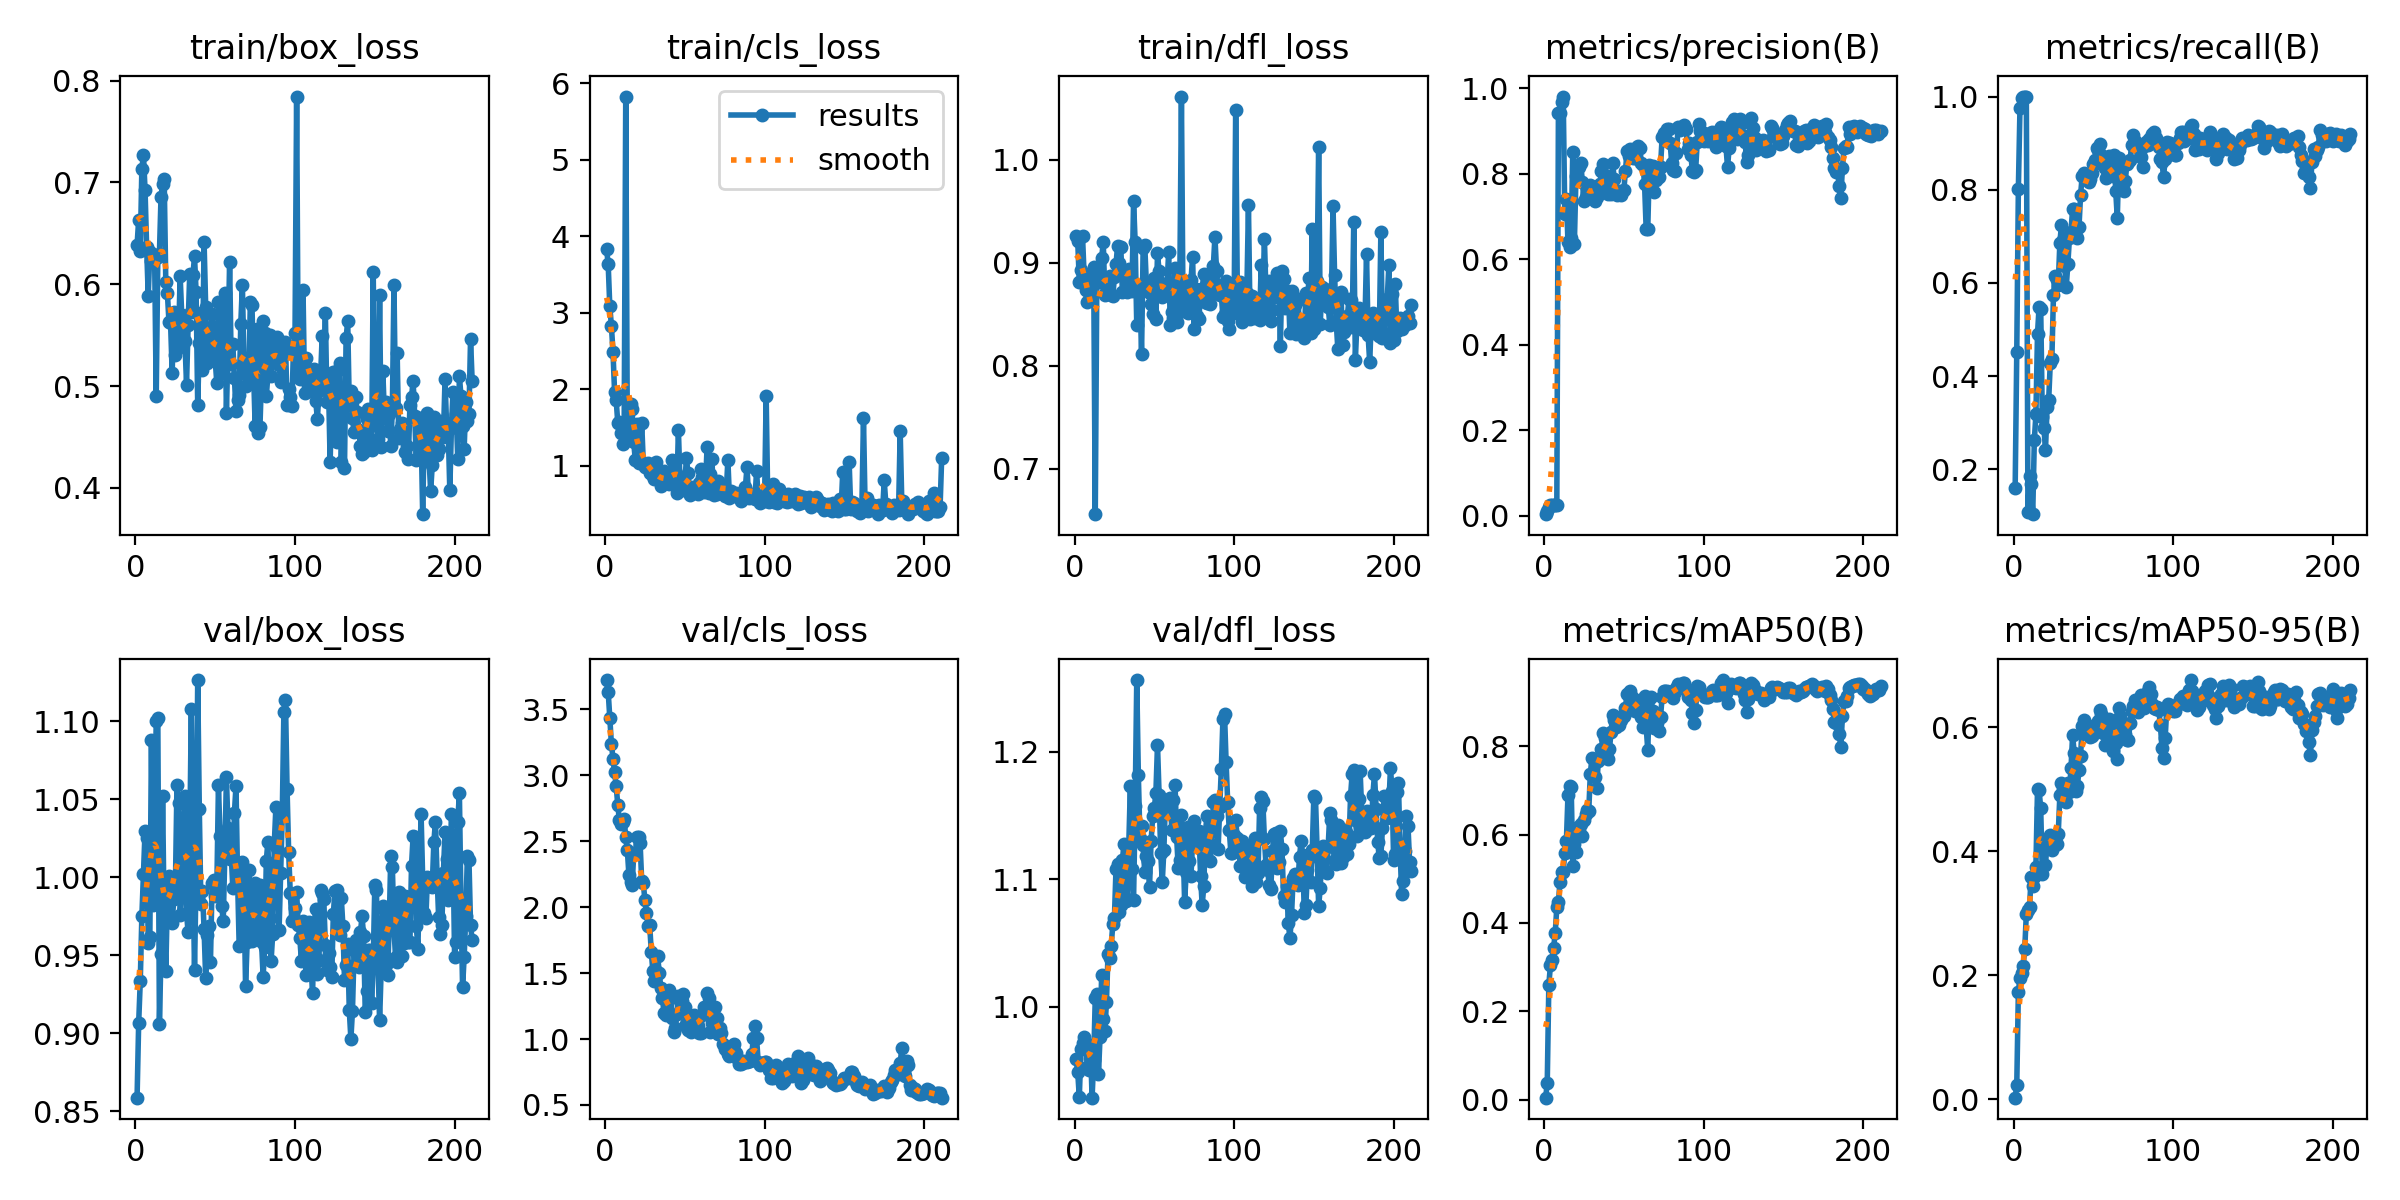

In [9]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

# Take a look at the validation 

In [10]:
!yolo task= detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data= /kaggle/working/Openvission-2/data.yaml

Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Openvission-2/train/labels.cache... 510 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        510       3294      0.909      0.937      0.943      0.676
                 Ksh 1        441       1320      0.965      0.991      0.988       0.72
                Ksh 10        270        897      0.945      0.939      0.967      0.694
                Ksh 20        363        612      0.857      0.941        0.9      0.645
                 Ksh 5        285        465      0.868      0.877      0.919      0.646
Speed: 0.6ms preprocess, 2.2ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Take a look at the predition mode

In [11]:
!yolo task= detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.5  source= /kaggle/working/Openvission-2/test/images

Ultralytics YOLOv8.2.51 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/24 /kaggle/working/Openvission-2/test/images/20240703_153137_jpg.rf.7faee70352f50e81ff7b9646a9c824b2.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 9.0ms
image 2/24 /kaggle/working/Openvission-2/test/images/20240703_153147_jpg.rf.aaf6da5408f4d2803a4a4f1883b10062.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 6.7ms
image 3/24 /kaggle/working/Openvission-2/test/images/20240703_153248_jpg.rf.91a66b687d36a475a960e675a19476ce.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 1 Ksh 20, 2 Ksh 5s, 7.1ms
image 4/24 /kaggle/working/Openvission-2/test/images/20240703_153407_jpg.rf.8bcc9e12e9b114b5ceeb0af0137dae1f.jpg: 640x640 1 Ksh 1, 7 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 6.0ms
image 5/24 /kaggle/working/Openvission-2/test/images/20240703_153809_jpg.rf.1d28764452c766811275bc16bc9d23b6.jpg: 640x640 3 Ksh 10s, 5.9ms
image 6/24 /k

# Use a for loop to show the predicted images 

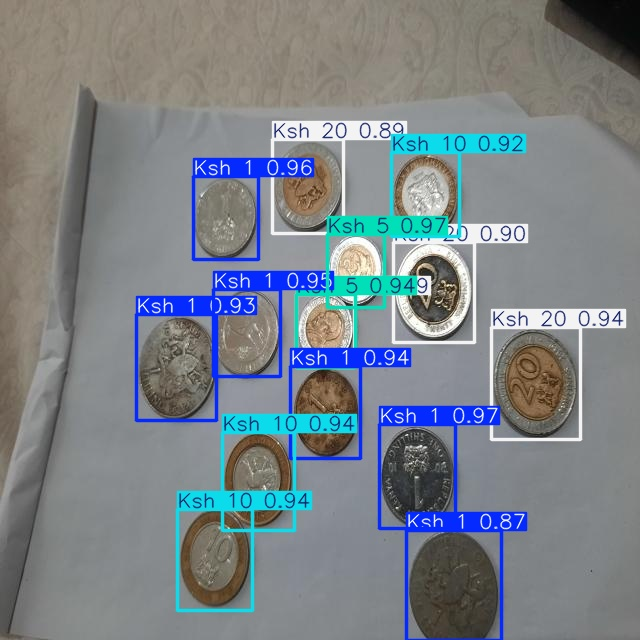

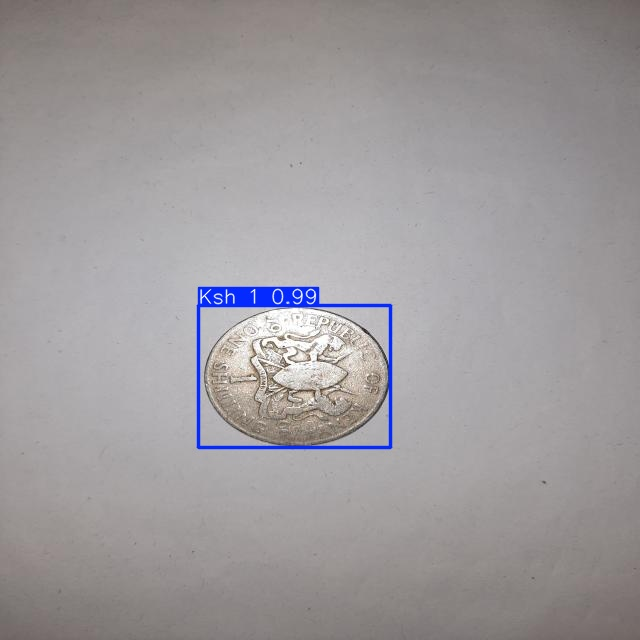

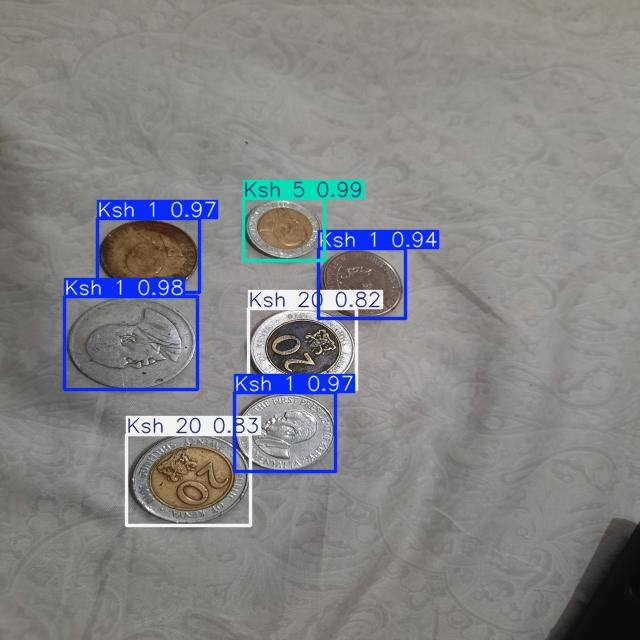

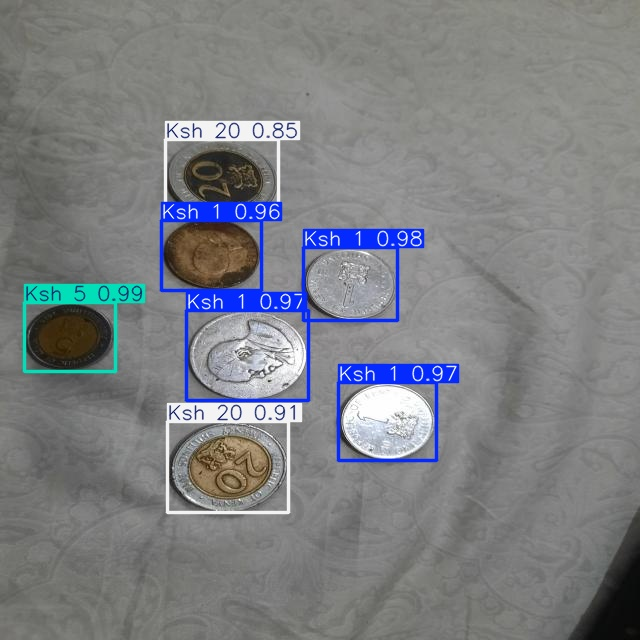

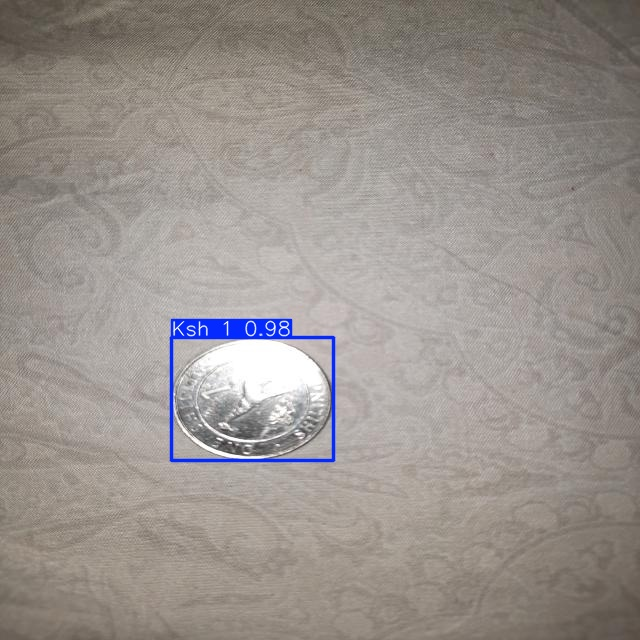

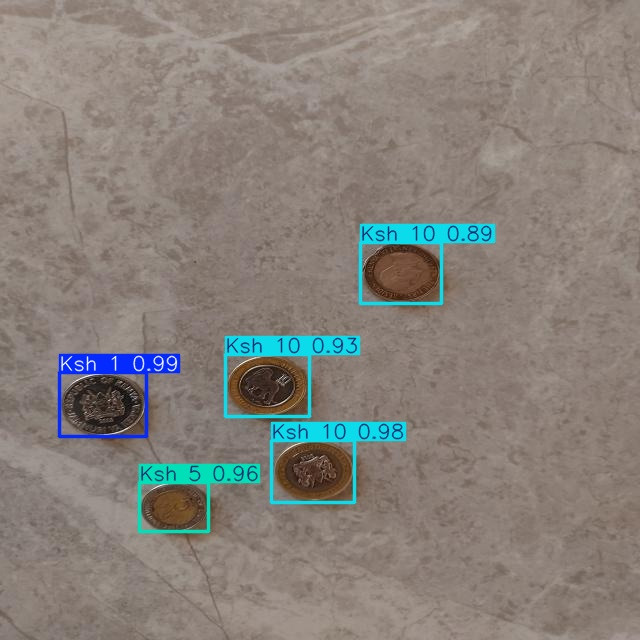

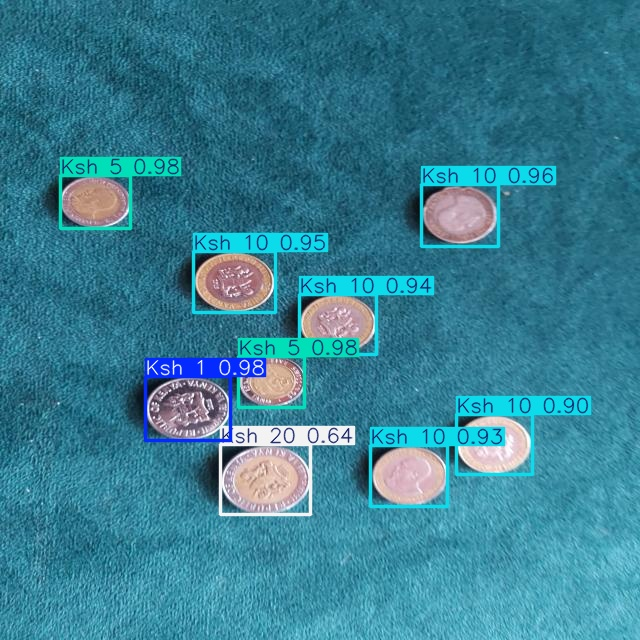

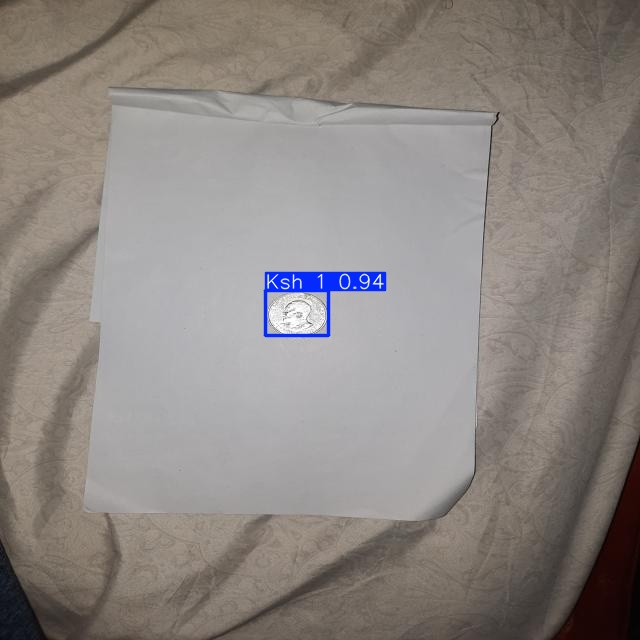

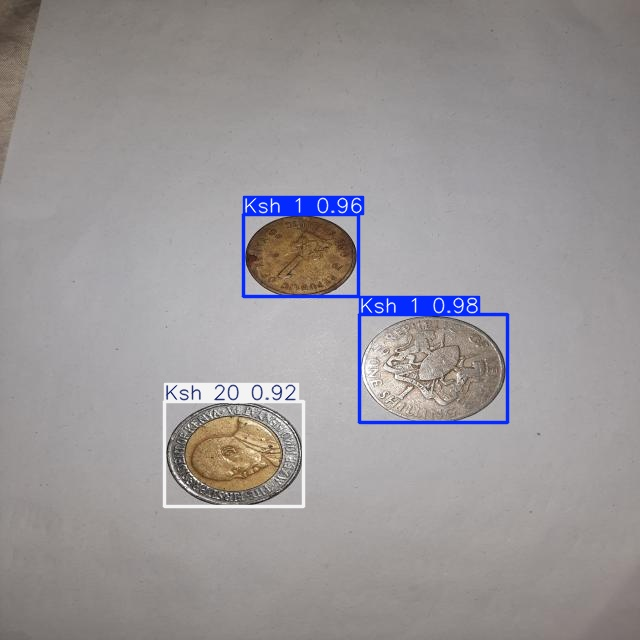

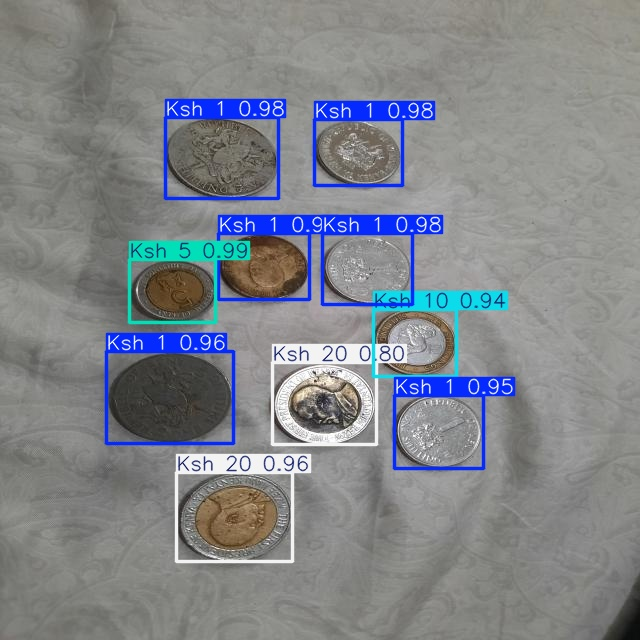

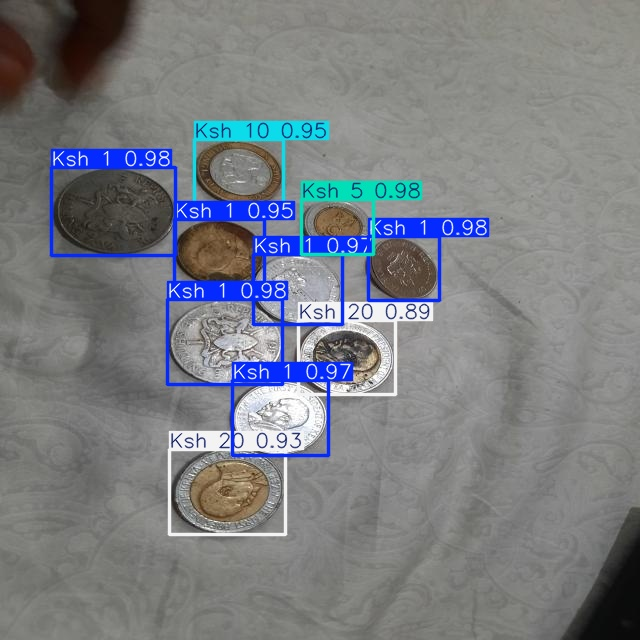

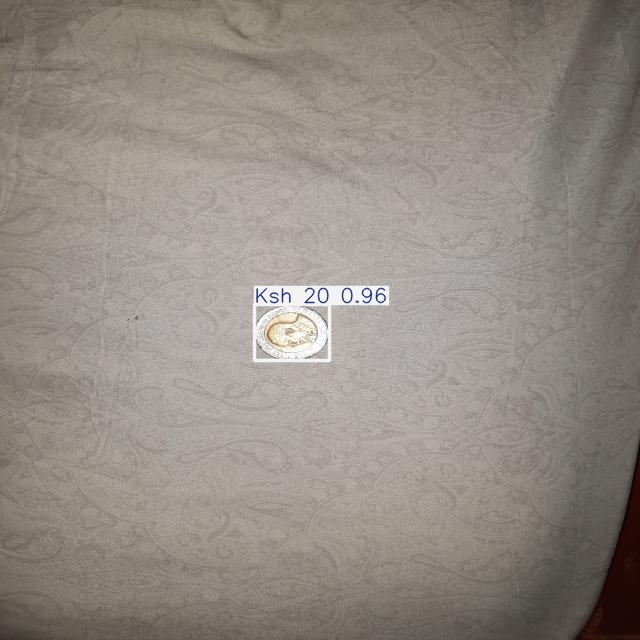

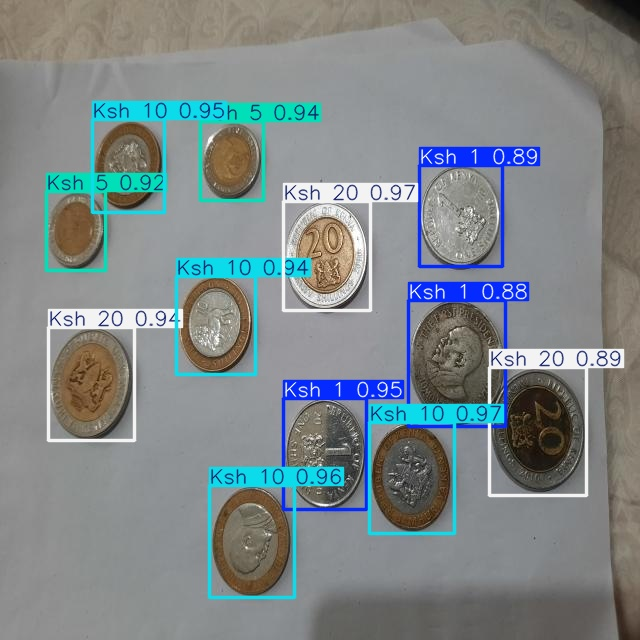

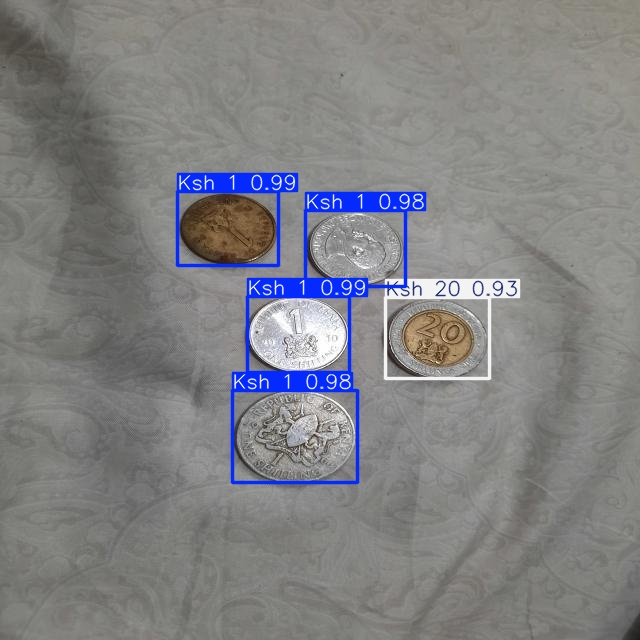

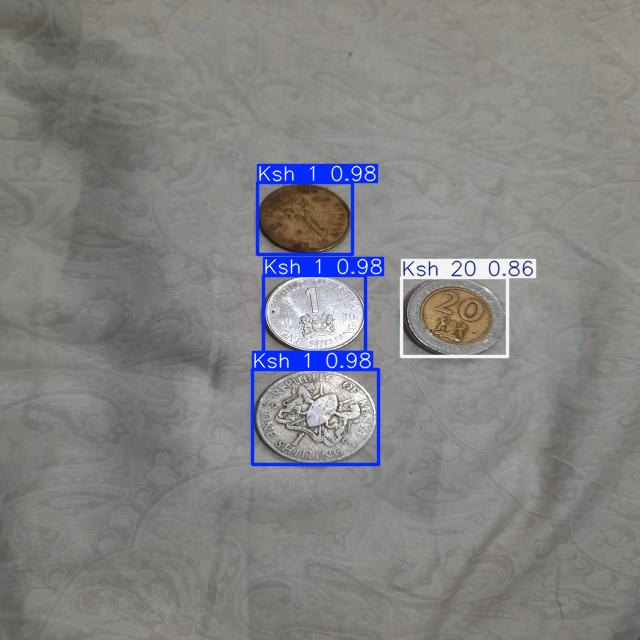

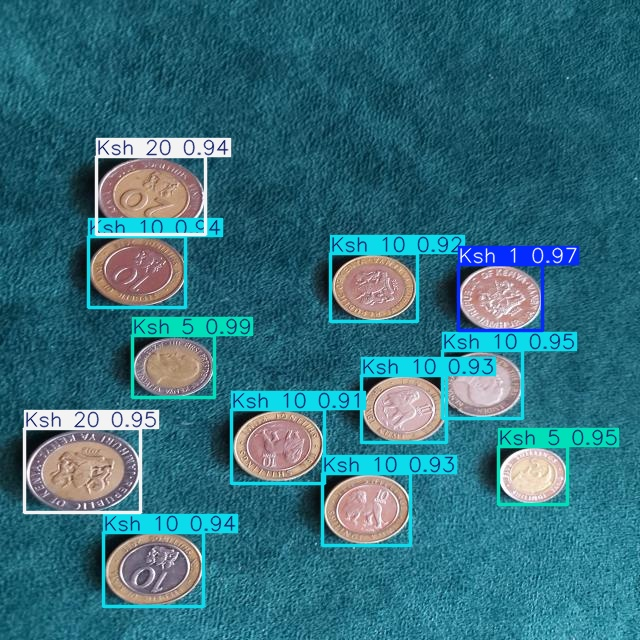

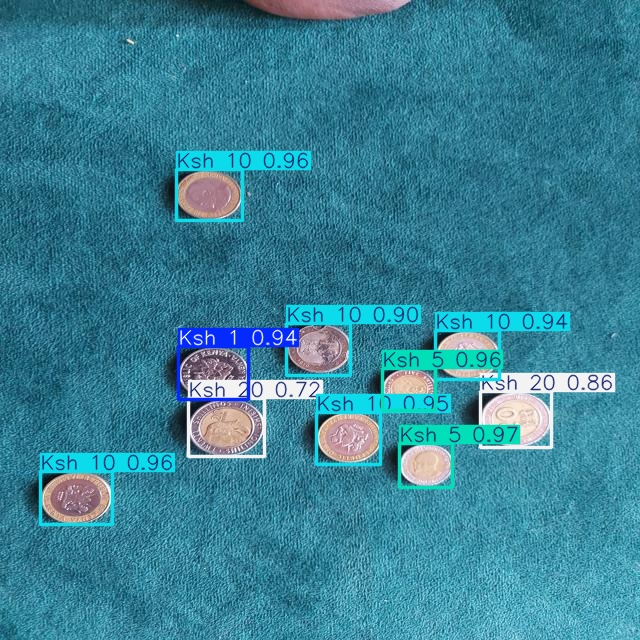

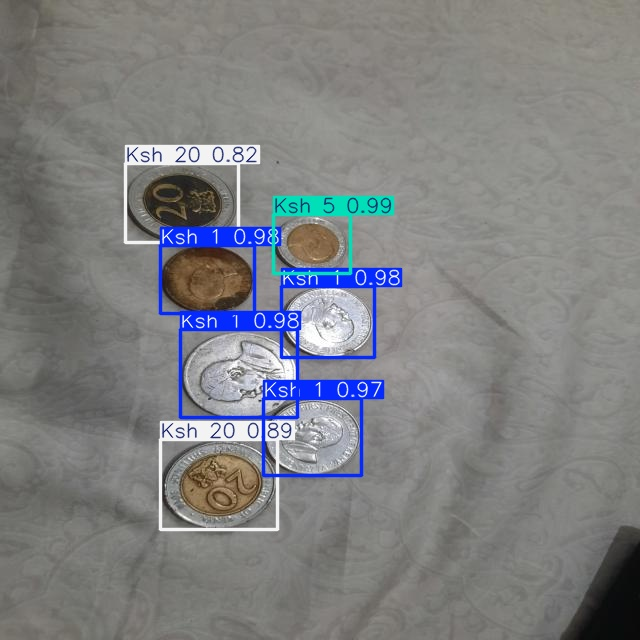

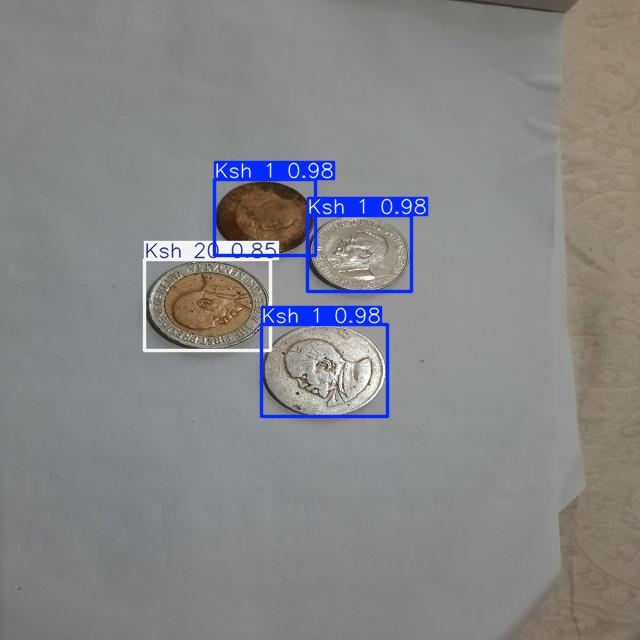

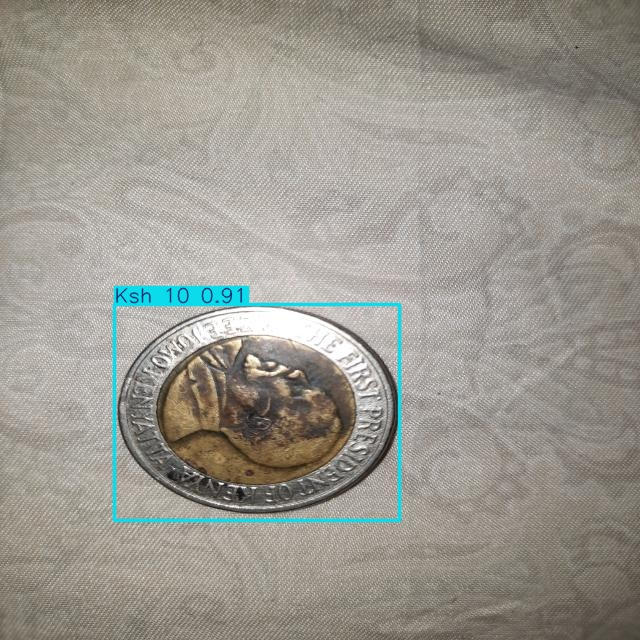

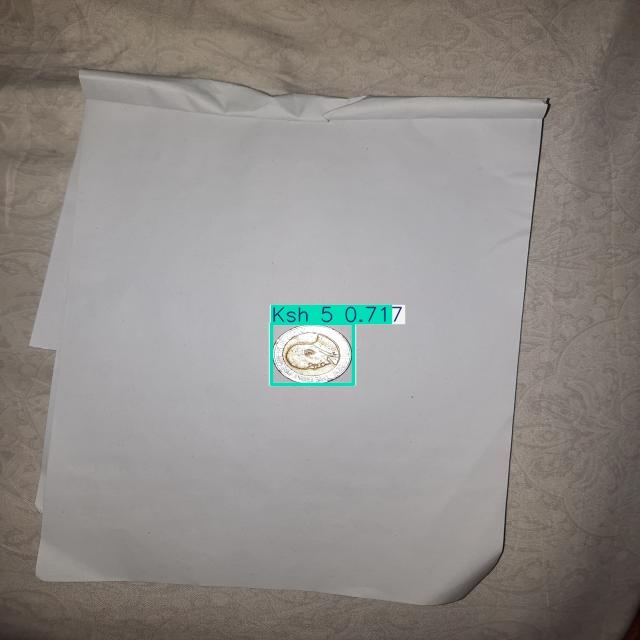

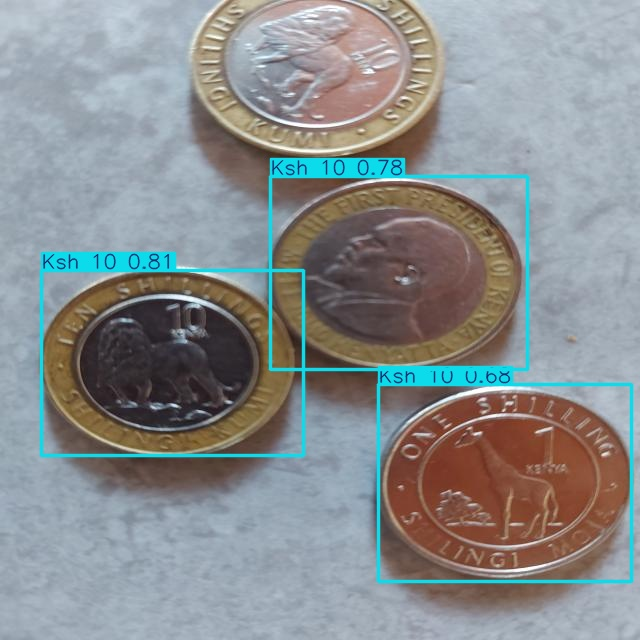

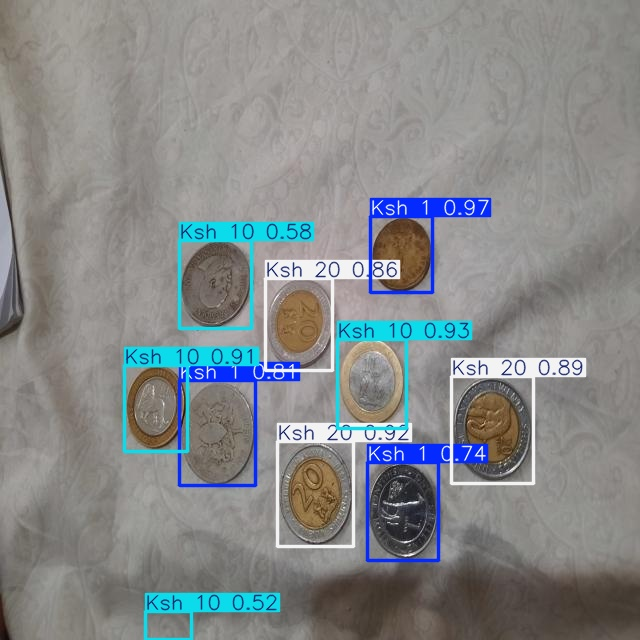

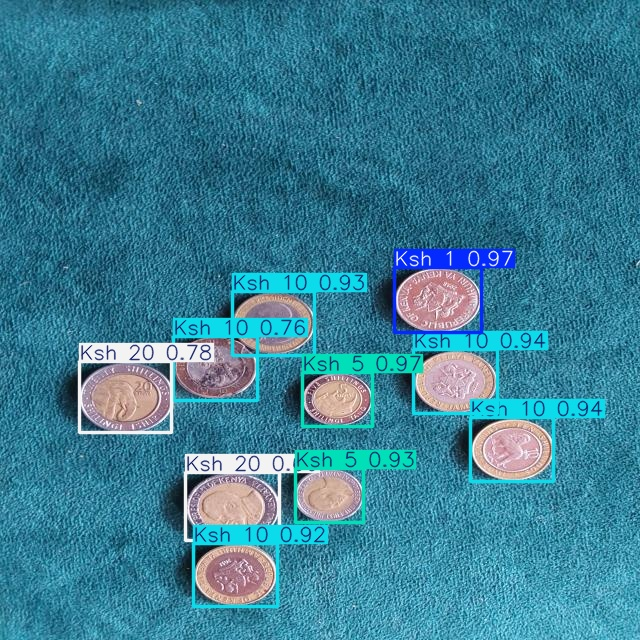

In [12]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path,height=600))
    print('\n')

## Upload the best model to roboflow

In [13]:
#can specify weights_filename, default is "weights/best.pt"
version = project.version(2)
#example1 - directory path is "training1/model1.pt" for yolov8 model
version.deploy("yolov8", "/kaggle/working/runs/detect/train/weights", "best.pt")

Dependency ultralytics==8.0.196 is required but found version=8.2.51, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  n


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.
